In [56]:
import re
import seaborn as sns
import pickle 
import pandas as pd
import itertools 
import matplotlib.pyplot as plt

In [2]:
vectorizer = pickle.load(open('larger_vectorizer.pk', 'rb')) 
vocab = vectorizer.get_feature_names()
train = pd.read_csv("tokenized_train_data.csv")
tokenized_lyrics = list(train['tokenized_lyrics'].values)

In [3]:
def calculate_tf(feature_list, tokenized_lyrics):
    feature_props = []
    for word in feature_list:
        term_count = 0
        for tokens in tokenized_lyrics:
            doc_count = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape(word), tokens))
            if doc_count != 0:
                term_count +=1
        feature_props.append(term_count/len(tokenized_lyrics))
    return feature_props

In [4]:
feature_props = calculate_tf(vocab, tokenized_lyrics)

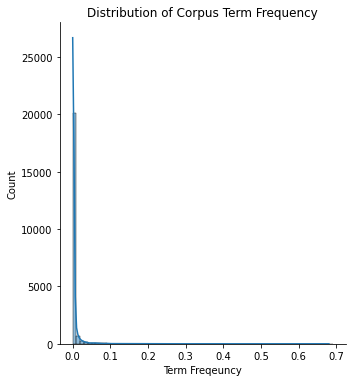

In [59]:
hist_plot = sns.displot(feature_props, binwidth=0.01, kde=True)
plt.title('Distribution of Corpus Term Frequency')
plt.xlabel('Term Freqeuncy')
hist_plot.savefig("corpus_term_freq_hist.png")

In [36]:
feature_dict = {word:prop for (word,prop) in zip(vocab, feature_props)}

In [43]:
first_five = dict(itertools.islice(feature_dict.items(), 50))
print(first_five)

{'00': 0.0009216589861751152, '000': 0.003686635944700461, '03': 0.0009216589861751152, '05': 0.0009216589861751152, '08': 0.0004608294930875576, '09': 0.0004608294930875576, '10': 0.0069124423963133645, '105': 0.0004608294930875576, '10day': 0.0004608294930875576, '10s': 0.0004608294930875576, '10th': 0.0009216589861751152, '11': 0.004608294930875576, '12': 0.002304147465437788, '12th': 0.0013824884792626728, '13': 0.0004608294930875576, '13k': 0.0004608294930875576, '14': 0.0013824884792626728, '1415': 0.0004608294930875576, '14th': 0.0013824884792626728, '15': 0.0009216589861751152, '150': 0.0004608294930875576, '15th': 0.0004608294930875576, '16s': 0.0004608294930875576, '17': 0.0009216589861751152, '1700s': 0.0004608294930875576, '17th': 0.0009216589861751152, '18': 0.0004608294930875576, '18th': 0.0004608294930875576, '19': 0.0004608294930875576, '19th': 0.0004608294930875576, '1da': 0.0018433179723502304, '1db': 0.0004608294930875576, '1st': 0.0027649769585253456, '20': 0.001382

In [44]:
sorted_dict = dict(sorted(feature_dict.items(), key=lambda item: item[1], reverse=True))

In [52]:
top_750 = dict(itertools.islice(sorted_dict.items(), 750))
print(top_750)

{'know': 0.6806451612903226, 'come': 0.5082949308755761, 'time': 0.4870967741935484, 'tell': 0.4345622119815668, 'let': 0.4271889400921659, 'love': 0.41751152073732717, 'think': 0.38755760368663594, 'shit': 0.3870967741935484, 'feel': 0.38571428571428573, 'need': 0.3728110599078341, 'want': 0.371889400921659, 'way': 0.3686635944700461, 'look': 0.3580645161290323, 'man': 0.35207373271889403, 'right': 0.34654377880184334, 'day': 0.34470046082949307, 'fuck': 0.3442396313364055, 'good': 0.3405529953917051, 'life': 0.33548387096774196, 'nigga': 0.3193548387096774, 'baby': 0.30230414746543777, 'thing': 0.2912442396313364, 'niggas': 0.2857142857142857, 'wanna': 0.2824884792626728, 'bitch': 0.276036866359447, 'leave': 0.271889400921659, 'girl': 0.26682027649769585, 'try': 0.2585253456221198, 'got': 0.25299539170506913, 'hear': 0.24285714285714285, 'hit': 0.23732718894009217, 'mind': 0.22857142857142856, 'find': 0.22119815668202766, 'live': 0.22119815668202766, 'head': 0.22027649769585253, 'nig

In [ ]:
# Train vectorizer that drops any words that show up less than 1% to 5% of the time in the training data
# Create scatter plot for train and test accuracy